# Decision Tree Implementation with Iris Dataset

In [40]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.tree import export_graphviz

%matplotlib inline

In [41]:
FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
Y = iris.target

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100, shuffle=True)

In [43]:
X_train.shape , X_test.shape

((120, 4), (30, 4))

In [44]:
decisionTree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)

In [45]:
decisionTree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [46]:
y_preds = decisionTree_entropy.predict(X_test)
y_preds

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2])

In [47]:
print ("Accuracy : ", accuracy_score(y_test,y_preds)*100)

Accuracy :  96.66666666666667


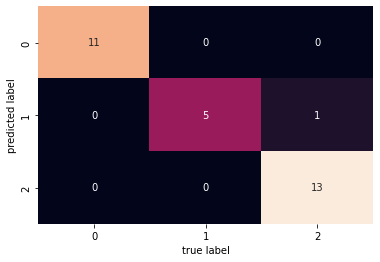

In [48]:
sns.heatmap(
    confusion_matrix(y_test, y_preds),
    annot=True,
    cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label");


In [49]:
export_graphviz(decisionTree_entropy, 
                'tree.dot', 
                feature_names = FEATURE_NAMES)

In [50]:
! dot -Tpng tree.dot -o tree.png

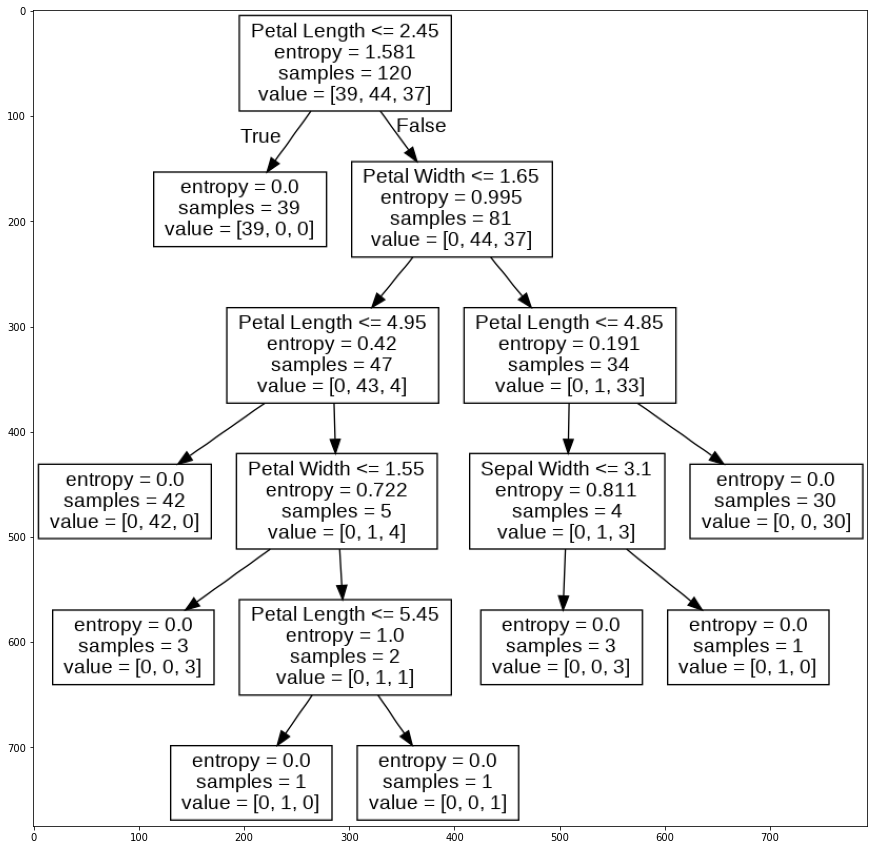

In [51]:
img = cv2.imread('tree.png')
plt.figure(figsize = (15, 15))
plt.imshow(img)